<a href="https://colab.research.google.com/github/amirabehery/AMIT/blob/main/CNN_Classification_ten_Categories.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import tensorflow as tf
import keras
import cv2
import glob as gb

In [2]:
train_path = '/content/drive/MyDrive/Computer_Vision/cnn_img/seg_train'
pred_path = '/content/drive/MyDrive/Computer_Vision/cnn_img/seg_pred'
test_path = '/content/drive/MyDrive/Computer_Vision/cnn_img/seg_test'

In [3]:
labels = os.listdir(train_path)
labels

['forest', 'glacier', 'mountain', 'sea', 'buildings', 'street']

In [4]:
def createDictForList(list1):
  list_dict = {}
  for i in range(len(list1)):
    list_dict[list1[i]] = i
  return list_dict


label_dict = createDictForList(labels)
label_dict

{'forest': 0,
 'glacier': 1,
 'mountain': 2,
 'sea': 3,
 'buildings': 4,
 'street': 5}

In [5]:
def subfolders(path_to_parent):
     try:
        return next(os.walk(path_to_parent))[1]
     except StopIteration:
        return []

In [6]:
def readImagesFromFolder(path):
  x_ = []
  y_ = []
  if subfolders(path):
    for folder in os.listdir(path):
      files = gb.glob(pathname = path + '/' + folder + '/*.jpg')
      for file in files:
        img = cv2.imread(file)
        img_arr = cv2.resize(img, (100,100))
        x_.append(list(img_arr))
        y_.append(label_dict[folder])
  else:
    files = gb.glob(pathname = path + '/*.jpg')
    for file in files:
      img = cv2.imread(file)
      img_arr = cv2.resize(img, (100,100))
      x_.append(list(img_arr))
  return x_, y_

In [7]:
train_images = readImagesFromFolder(train_path)
test_images = readImagesFromFolder(test_path)
pred_images = readImagesFromFolder(pred_path)

In [8]:
len(train_images[0]), len(train_images[1]), len(test_images[0]), len(test_images[1]), len(pred_images[0]), len(pred_images[1])

(14034, 14034, 3000, 3000, 80, 0)

In [9]:
def getImageSizesFromFolder(path):
  sizes = []
  if subfolders(path):
    for folder in os.listdir(path):
      files = gb.glob(pathname = path + '/' + folder + '/*.jpg')
      for file in files:
        img = cv2.imread(file)
        sizes.append(img.shape)
  else:
    files = gb.glob(pathname = path + '/*.jpg')
    for file in files:
        img = cv2.imread(file)
        sizes.append(img.shape)
  return pd.Series(sizes).value_counts()

In [10]:
getImageSizesFromFolder(train_path)

(150, 150, 3)    13986
(113, 150, 3)        7
(135, 150, 3)        3
(111, 150, 3)        3
(144, 150, 3)        2
(134, 150, 3)        2
(108, 150, 3)        2
(123, 150, 3)        2
(142, 150, 3)        2
(146, 150, 3)        2
(143, 150, 3)        2
(136, 150, 3)        2
(81, 150, 3)         1
(147, 150, 3)        1
(145, 150, 3)        1
(131, 150, 3)        1
(141, 150, 3)        1
(100, 150, 3)        1
(140, 150, 3)        1
(103, 150, 3)        1
(102, 150, 3)        1
(97, 150, 3)         1
(76, 150, 3)         1
(110, 150, 3)        1
(105, 150, 3)        1
(119, 150, 3)        1
(149, 150, 3)        1
(120, 150, 3)        1
(115, 150, 3)        1
(133, 150, 3)        1
(124, 150, 3)        1
dtype: int64

In [11]:
x_train, y_train = train_images[0], train_images[1]

In [12]:
x_test, y_test = test_images[0], test_images[1]


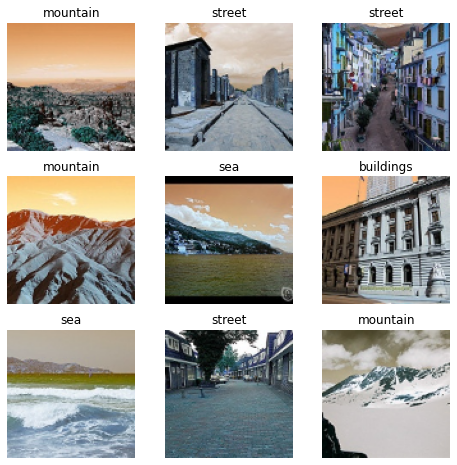

In [13]:
plt.figure(figsize=(8,8))
for n , i in enumerate(list(np.random.randint(0,len(x_train),9))) : 
    plt.subplot(3,3,n+1)
    plt.imshow(x_train[i])   
    plt.axis('off')
    plt.title(list(label_dict.keys())[list(label_dict.values()).index(y_train[i])])

In [14]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

print(f'X_train shape  is {x_train.shape}')
print(f'X_test shape  is {x_test.shape}')
print(f'y_train shape  is {y_train.shape}')
print(f'y_test shape  is {y_test.shape}')

X_train shape  is (14034, 100, 100, 3)
X_test shape  is (3000, 100, 100, 3)
y_train shape  is (14034,)
y_test shape  is (3000,)


In [15]:
my_model = keras.models.Sequential([
  keras.layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(100,100,3)),
  keras.layers.Conv2D(150,kernel_size=(3,3),activation='relu'),
  keras.layers.MaxPool2D(4,4),
  keras.layers.Conv2D(120,kernel_size=(3,3),activation='relu'),
  keras.layers.MaxPool2D(4,4),
  keras.layers.Flatten() ,    
  keras.layers.Dense(120,activation='relu') ,    
  keras.layers.Dense(100,activation='relu') ,    
  keras.layers.Dense(50,activation='relu') ,        
  keras.layers.Dropout(rate=0.5) ,            
  keras.layers.Dense(6,activation='softmax') ,    
  ])

In [16]:
my_model.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [17]:
my_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 200)       5600      
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 150)       270150    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 150)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 120)       162120    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 120)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3000)              0

In [18]:
fitting_process = my_model.fit(x_train, y_train, epochs=10,batch_size=64,verbose=1)

Epoch 1/10
220/220 [==============================] - 54s 179ms/step - loss: 1.7254 - accuracy: 0.4154
Epoch 2/10
220/220 [==============================] - 39s 175ms/step - loss: 1.0284 - accuracy: 0.5957
Epoch 3/10
220/220 [==============================] - 39s 177ms/step - loss: 0.8815 - accuracy: 0.6756
Epoch 4/10
220/220 [==============================] - 39s 178ms/step - loss: 0.7786 - accuracy: 0.7286
Epoch 5/10
220/220 [==============================] - 39s 179ms/step - loss: 0.7456 - accuracy: 0.7448
Epoch 6/10
220/220 [==============================] - 40s 180ms/step - loss: 0.6407 - accuracy: 0.7840
Epoch 7/10
220/220 [==============================] - 40s 180ms/step - loss: 0.6023 - accuracy: 0.7955
Epoch 8/10
220/220 [==============================] - 40s 181ms/step - loss: 0.5335 - accuracy: 0.8214
Epoch 9/10
220/220 [==============================] - 40s 180ms/step - loss: 0.5138 - accuracy: 0.8276
Epoch 10/10
220/220 [==============================] - 40s 180ms/step - l

In [19]:
loss, accuracy = my_model.evaluate(x_test, y_test)

print(f'Test Loss is {loss}')
print(f'Test Accuracy is {accuracy}')

94/94 [==============================] - 4s 34ms/step - loss: 0.7177 - accuracy: 0.7723
Test Loss is 0.7177220582962036
Test Accuracy is 0.7723333239555359


In [20]:
y_pred = my_model.predict(x_test)

print(f'Prediction Shape is {y_pred.shape}')

94/94 [==============================] - 3s 26ms/step
Prediction Shape is (3000, 6)


In [24]:
x_pred = np.array(pred_images[0])

In [25]:
y_result = my_model.predict(x_pred)

print(f'Prediction Shape is {y_result.shape}')

3/3 [==============================] - 1s 248ms/step
Prediction Shape is (80, 6)


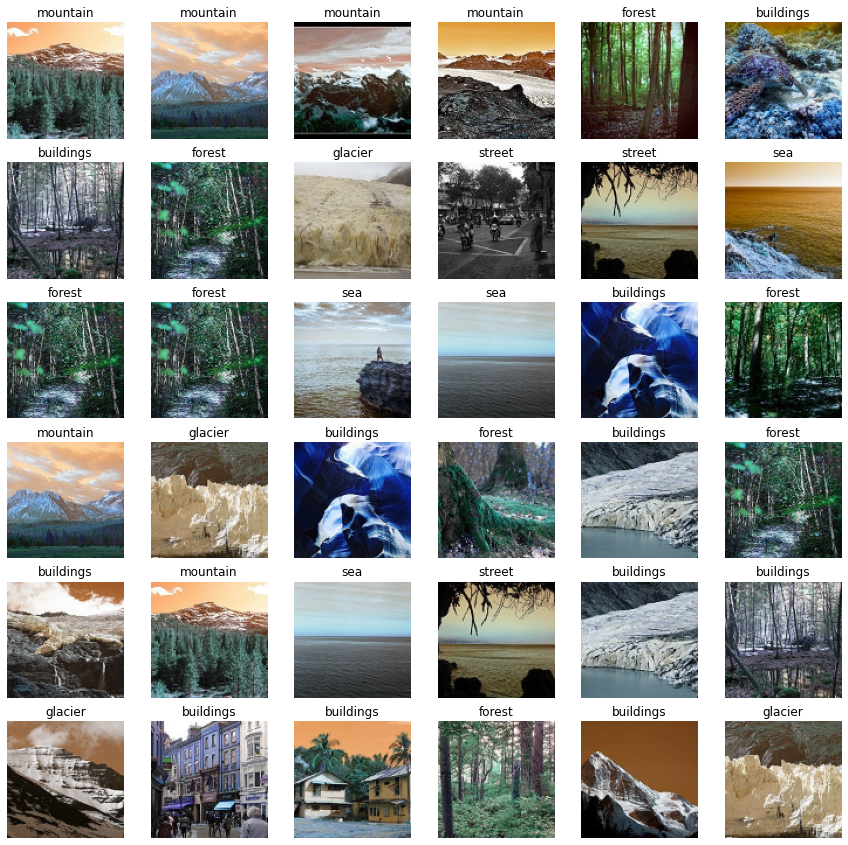

In [41]:
plt.figure(figsize=(15,15))
for n , i in enumerate(list(np.random.randint(0,len(pred_images[0]),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(pred_images[0][i])   
    plt.axis('off')
    plt.title(list(label_dict.keys())[list(label_dict.values()).index(np.argmax(y_result[i]))])